# Voorspellen van credit card fraude
Een bekende dataset op Kaggle is de Credit Card Fraud Detection dataset. Je vindt meer informatie hierover via deze link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In deze opdracht gaan we aan de slag met deze dataset. Het doel is om zoveel mogelijk credit card fraude te herkennen.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### 1A Inlezen data
- Lees de data in creditcard.csv in als een dataframe

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MakeITWork/Week_10/creditcard.csv')

### 1B Controleer de data
- Controleer of de data voldoet aan de eerder genoemde 3 voorwaarden voor machine learning. Geef aan in hoeverre de data voldoet.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### 1C target & features
- Welke kolom is de "target" kolom? 
- Wat zijn de unieke waardes in deze kolom?
- Leg uit waat de betekenis is van deze waardes.

In [9]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
387/ (387+202534)*100

0.19071461307602466

## 2 Logistic Regression

### 2A train-test plit
- Splits de data in X en y
- Splits de data in trainsets en testsets

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

### 2B Logistic regression uitvoeren
- Pas de logistic regression module toe van sklearn op de trainingsdata.
- Maak hiermee voorspellingen voor de testset.
    - Als je de default instellingen gebruikt krijg je melding over "Iterations".
    - Je kunt dit oplossen door een parameterwaarde aan te passen. Onderzoek de documentatie van sklearn en pas de parameterwaarde aan zodat de melding niet meer voorkomt. 

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [15]:
y_pred.sum(), y_test.sum()

(82, 120)

In [16]:
len(y_pred), len(y_test)

(71202, 71202)

In [17]:
test = pd.DataFrame(data= {'predictions': y_pred, 'actual': y_test})
test["difference"] = test.predictions - test.actual
test["difference"].value_counts()

# 0 correct,
# -1 predicted no fraud while it was fraud
# 1 predicted fraud while it wasnt fraud

 0    71142
-1       49
 1       11
Name: difference, dtype: int64

In [18]:
display(pd.crosstab(test.actual, test.predictions))

predictions,0,1
actual,,
0,71071,11
1,49,71


## 3 metrics

### 3A Vorm van supervised learning
- Welke vorm van supervised learning heb je hierboven toegepast?
```classification sv learning```
- Met welke 'metric' wordt deze vorm van machine learning in het algemeen beoordeeld?
- Bepaal de score op deze metric met sklearn.
- In hoeverre is deze score voor deze dataset een nuttige metric?

In [59]:
from sklearn.metrics import classification_report

### 3B Confusion matrix
- Gebruik sklearn om een confusion matrix te maken.
- Wijs de confusion matrix toe aan de variabele cm en toon de confusion matrix
- Gebruik ConfusionMatrixDisplay om een gekleurd overzicht van de matrix te maken.

array([[71071,    11],
       [   49,    71]])

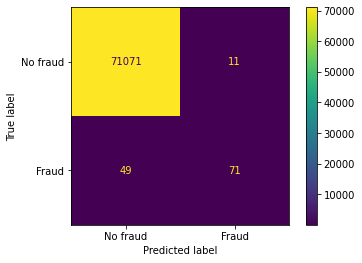

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels =["No fraud", "Fraud"])
cmd.plot()

display(cm)

### 3C recall, precision & f1-score
- Maak 4 variabelen aan:
    - TN: Wijs hieraan het aantal 'True Negatives' uit cm toe.
    - TP: Wijs hieraan het aantal 'True Positives' uit cm toe.
    - FN: Wijs hieraan het aantal 'False Negatives' uit cm toe.
    - FP: Wijs hieraan het aantal 'False Positives' uit cm toe.    
- Bereken de precision en recall op basis van deze 4 variabelen.
- Leg in eigen woorden uit wat precision en recall betekenen.

![image.png](attachment:image.png)

- Bereken en toon de f1-score
- Controleer je antwoorden met het classification report van sklearn

In [22]:
TN = cm[0,1]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
precision = TP / (TP + FP)
recall = TP / (TP + FN)

f1 = 2*precision*recall / (precision+recall)
f1

0.702970297029703

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.87      0.59      0.70       120

    accuracy                           1.00     71202
   macro avg       0.93      0.80      0.85     71202
weighted avg       1.00      1.00      1.00     71202



### 3D Kansen
- Gebruik het eerder gedefinieerde logistic regression model om kansen ('probabilities') te berekenen per klasse op basis van de testdata.
- Toon de eerste 5 rijen van deze kansen.

In [37]:
probs = model.predict_proba(X_train)

In [47]:
display(probs.shape, probs.dtype) 
probs

(213605, 2)

dtype('float64')

array([[9.99457232e-01, 5.42768452e-04],
       [9.99602706e-01, 3.97293819e-04],
       [9.99999761e-01, 2.39309819e-07],
       ...,
       [9.99814602e-01, 1.85397826e-04],
       [9.99996892e-01, 3.10782150e-06],
       [9.99975866e-01, 2.41344290e-05]])

### 3E True Positive Rate & False Positive Rate
- Maak 2 variabelen aan:
    - TPR: True Positive Rate
    - FPR: False Positive Rate
- Toon en bereken deze op basis van de confusion matrix en je eerdere gedefinieerde variabelen (TN, TP, FN, FP).

In [58]:
TPR = TP / (TP+FN) * 100
FPR = FP / (TN+FP) * 100
f"True positive rate = {TPR:.2f} % , False positive rate = {FPR:.2f} %"

'True positive rate = 59.17 % , False positive rate = 50.00 %'

### 3F ROC
- Toon de ROC Curve
- Leg uit wat deze grafiek laat zien

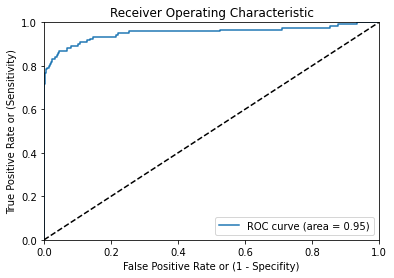

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# predict_proba returns the probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# AUC
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")


### 3G AUC
- Toon de Area Under the Curve.
- Waarvoor is dit een nuttige metric?

***The AUC is useful because it summarizes the classifier's performance across all possible thresholds and provides a single scalar metric to compare classifiers or to select the best threshold for a specific task.***

### 3H beste metric
- Welke van bovengenoemde metrics is / zijn het meest geschikt voor het beoordelen van machine learning voor deze dataset? Waarom?

### Antwoord 3H:
In this case, since we are working on a fraud detection problem, it is usually more important to minimize false negatives (i.e., cases of fraud that are not detected) than false positives (i.e., cases that are incorrectly identified as fraud). This is because a false negative may result in a financial loss, while a false positive may simply lead to an inconvenience(debatable). 

With this in mind, some metrics we could consider include:

- **Recall**: This metric measures the proportion of actual fraud cases that are correctly detected by the model. It is calculated as recall = True Positives / (True Positives + False Negatives). A high recall score indicates that the model is able to detect most of the fraud cases.

- **Precision**: This metric measures the proportion of positive predictions that are actually correct. Precision = True Positives / (True Positives + False Positives). A high precision score indicates that the model is not making many false fraud predictions.

- **F1-score**: This is the harmonic mean of precision and recall, and provides a balance between them. F1-score = 2 * ((Precision * Recall) / (Precision + Recall)).

- **Matthew's correlation coefficient** (MCC): This is a balanced metric that considers the number of true and false positives and negatives and provides a single score that ranges from -1 to 1, where a value of 1 indicates a perfect classifier.

In this case, we have a recall score of 0.59 and a precision score of 0.87, so we may want to consider improving the recall while maintaining a high precision. The F1-score of 0.70 provides a balance between precision and recall. MCC provides a single score that takes into account both precision and recall and the number of true and false positive and negative predictions.


Matthew's Correlation Coefficient: 0.72.


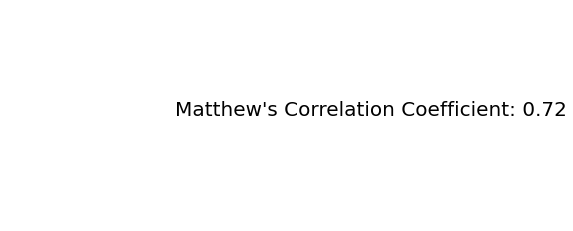

In [68]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f"Matthew's Correlation Coefficient: {mcc:.2f}.")

## 4 Parameter tuning
- Pas twee methoden van hyperparameter tuning toe op dit model.
- Een mogelijke parameter for logistic regression is 'C'. Onderzoek wat deze parameter doet.
- Bij welke C geeft het model de beste resultaten op de metric van 3H?

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold

kf = KFold(n_splits=2, shuffle=True, random_state=0)
param_grid = {"C" : [0.01, 0.1, 1, 2, 100]}
log_reg = LogisticRegression(max_iter=500)

logreg_cv = GridSearchCV(log_reg, param_grid, cv=kf, scoring="f1")
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=2, random_state=0, shuffle=True),
             estimator=LogisticRegression(max_iter=500),
             param_grid={'C': [0.01, 0.1, 1, 2, 100]}, scoring='f1')

In [ ]:
print(logreg_cv.best_params_, logreg_cv.best_score_)

{'C': 1} 0.7164570230607967


In [ ]:
tuned_model = LogisticRegression(max_iter=500, C=10)
tuned_model.fit(X_train, y_train)
tuned_y_pred = tuned_model.predict(X_test)

In [ ]:
print(classification_report(y_test, tuned_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.87      0.59      0.70       120

    accuracy                           1.00     71202
   macro avg       0.93      0.80      0.85     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
tuned_cm = confusion_matrix(y_test, tuned_y_pred)
display(tuned_cm)


array([[71071,    11],
       [   49,    71]], dtype=int64)

C value:  1
Accuracy: 1.00
Precision: 0.87
Recall: 0.59
F1-score: 0.70



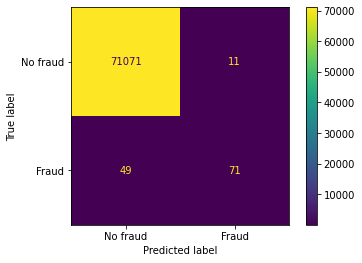

C value:  3
Accuracy: 1.00
Precision: 0.89
Recall: 0.59
F1-score: 0.71



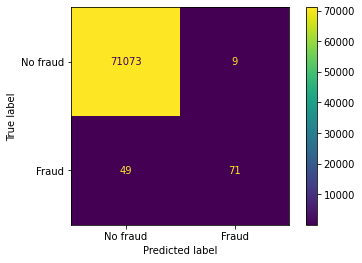

C value:  5
Accuracy: 1.00
Precision: 0.86
Recall: 0.59
F1-score: 0.70



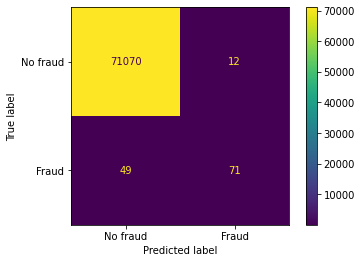

C value:  7
Accuracy: 1.00
Precision: 0.87
Recall: 0.59
F1-score: 0.70



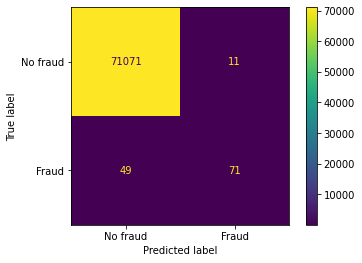

C value:  9
Accuracy: 1.00
Precision: 0.87
Recall: 0.60
F1-score: 0.71



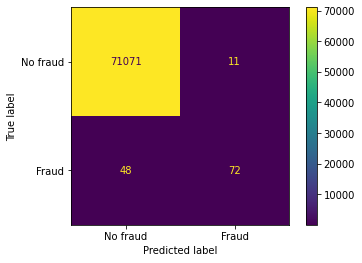

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

for c in range(1,10,2):
    model = LogisticRegression(max_iter=500, C=c)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cmd = ConfusionMatrixDisplay(cm, display_labels =["No fraud", "Fraud"])
    cmd.plot()
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("C value: ", c)
    print("Accuracy: {:.2f}".format(acc))
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("F1-score: {:.2f}".format(f1))
    plt.show()
    print()